In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

In [36]:
df1 = pd.read_csv('calories_data.csv') 
df2 = pd.read_csv('exercise_data.csv') 
 
merge_data = pd.merge(df1, df2, how='outer') 
print(merge_data) 

        User_ID  Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      10001159      76.0  female   67   176.0    74.0      12.0       103.0       39.6
1      10001607      93.0  female   34   178.0    79.0      19.0        96.0       40.6
2      10005485      49.0  female   38   178.0    77.0      14.0        82.0       40.5
3      10005630      36.0  female   39   169.0    66.0       8.0        90.0       39.6
4      10006441     122.0    male   23   169.0    73.0      25.0       102.0       40.7
...         ...       ...     ...  ...     ...     ...       ...         ...        ...
14995  19999044     129.0  female   25   169.0    66.0      22.0       105.0       40.6
14996  19999086      42.0  female   31   170.0    69.0       9.0        93.0       39.8
14997  19999257     112.0    male   21   176.0    75.0      19.0       109.0       40.5
14998  19999394      42.0  female   36   152.0    54.0      10.0        86.0       39.7
14999  19999647     152.0    mal

In [37]:
merge_data.to_csv('maindata.csv', index=False)

In [38]:
df = pd.read_csv('maindata.csv')
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,10001159,76.0,female,67,176.0,74.0,12.0,103.0,39.6
1,10001607,93.0,female,34,178.0,79.0,19.0,96.0,40.6
2,10005485,49.0,female,38,178.0,77.0,14.0,82.0,40.5
3,10005630,36.0,female,39,169.0,66.0,8.0,90.0,39.6
4,10006441,122.0,male,23,169.0,73.0,25.0,102.0,40.7


In [39]:
df.shape

(15000, 9)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [41]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


Analysis

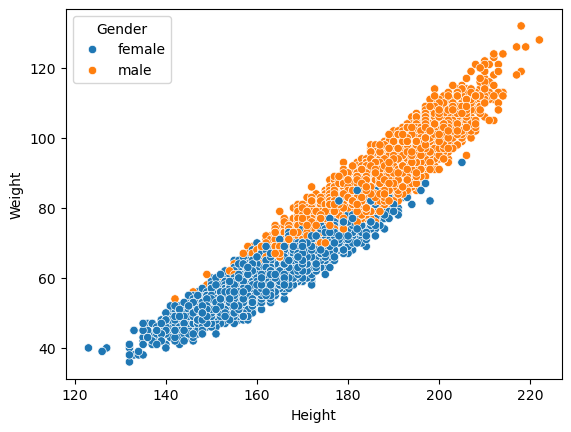

In [42]:
sb.scatterplot(x='Height', y='Weight',hue='Gender', data=df) 
plt.show()

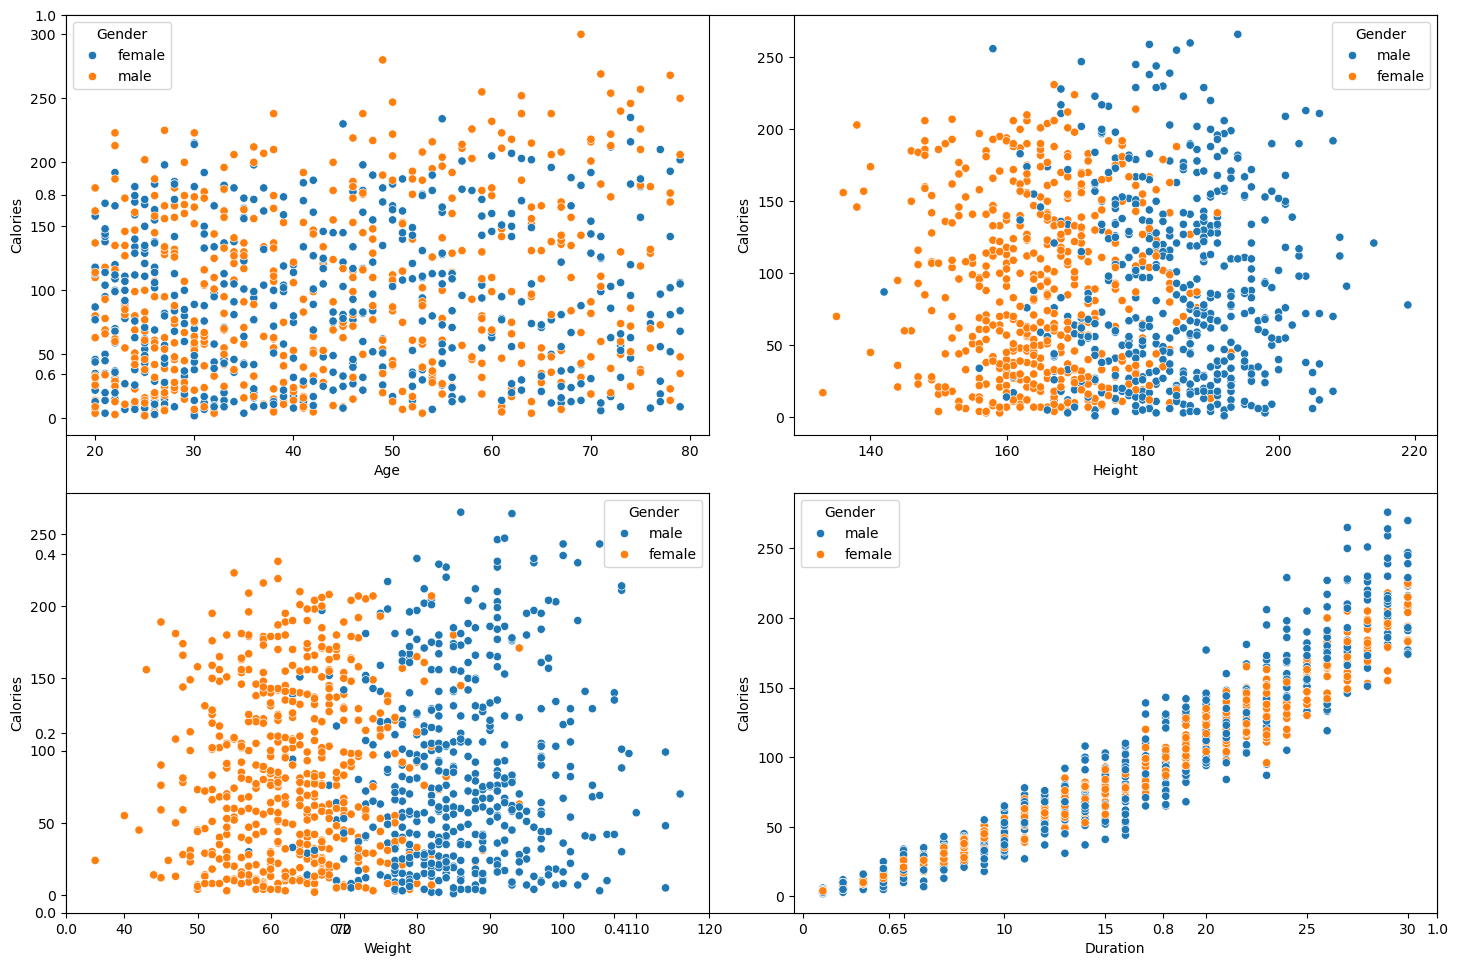

In [43]:
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = df.sample(1000)
    sb.scatterplot(x=col, y='Calories',hue='Gender', data=x)
plt.tight_layout()
plt.show()

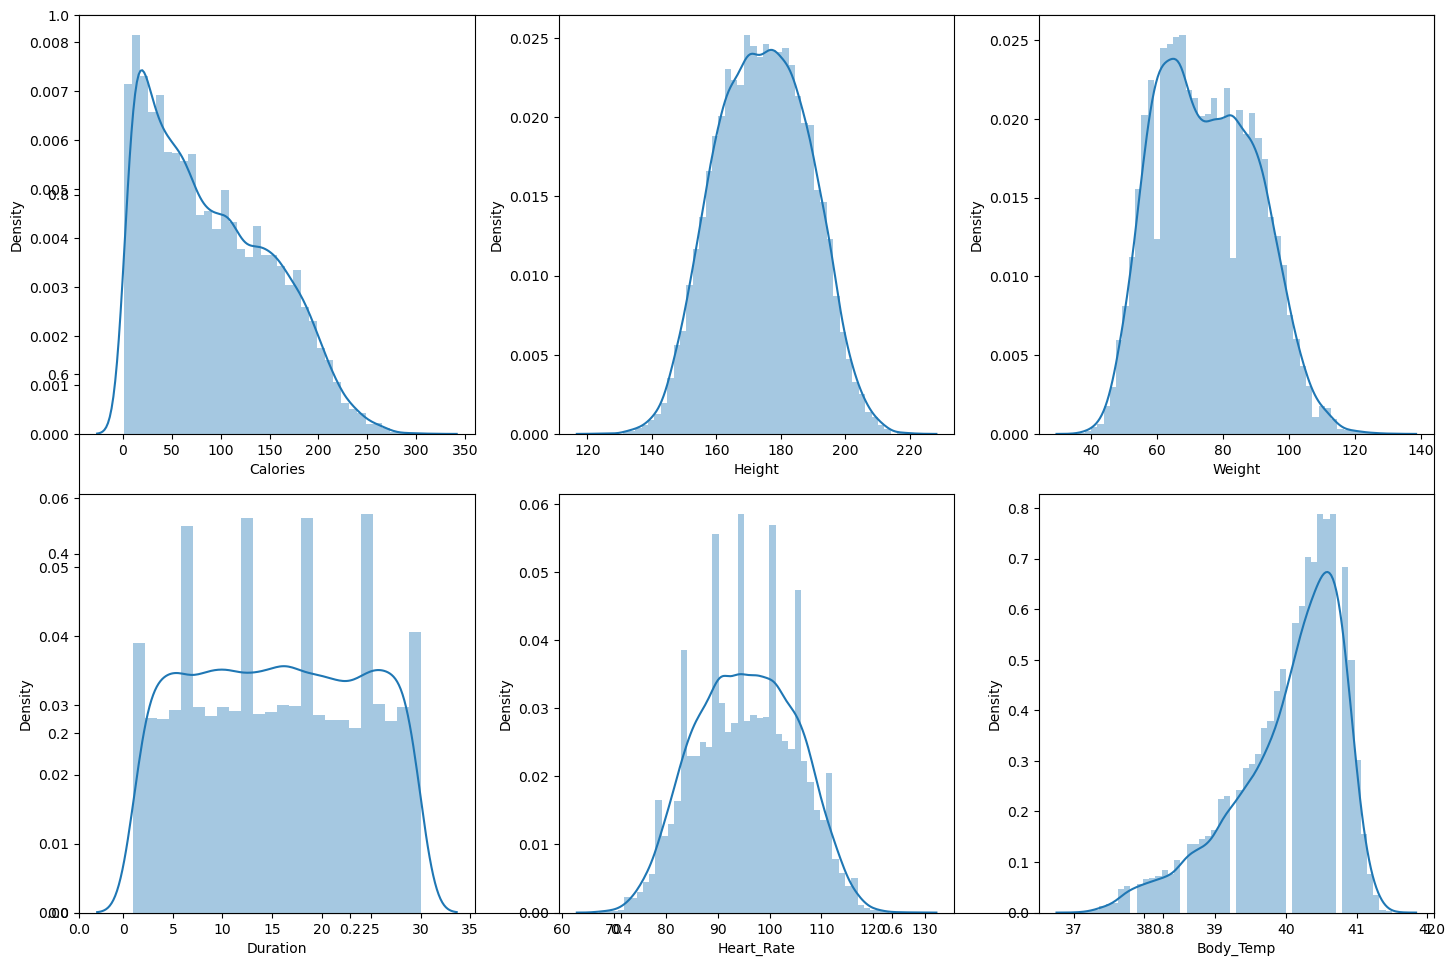

In [44]:
features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

In [45]:
df.replace({'male': 0, 'female': 1},
           inplace=True)
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,10001159,76.0,1,67,176.0,74.0,12.0,103.0,39.6
1,10001607,93.0,1,34,178.0,79.0,19.0,96.0,40.6
2,10005485,49.0,1,38,178.0,77.0,14.0,82.0,40.5
3,10005630,36.0,1,39,169.0,66.0,8.0,90.0,39.6
4,10006441,122.0,0,23,169.0,73.0,25.0,102.0,40.7


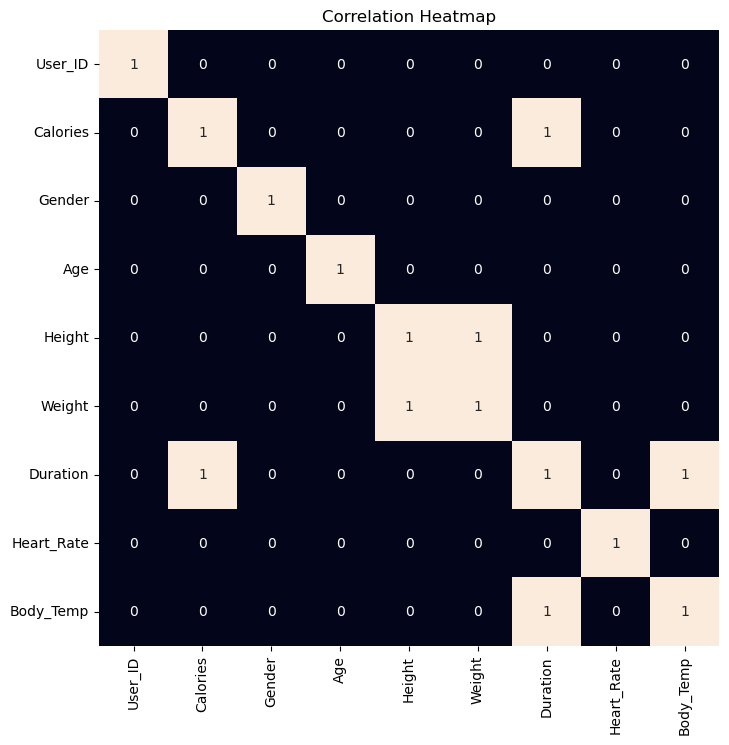

In [46]:
plt.figure(figsize=(8, 8))
plt.title('Correlation Heatmap')
sb.heatmap(df.corr() > 0.9,
           annot=True,
           cbar=False)
plt.show()

In [47]:
to_remove = ['Weight', 'Duration']
df.drop(to_remove, axis=1, inplace=True)

Model Training

In [48]:
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values

X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.1,
                                      random_state=22)
X_train.shape, X_val.shape

((13500, 5), (1500, 5))

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [50]:
models = [LinearRegression(), RandomForestRegressor()]

for i in range(2):
    models[i].fit(X_train, Y_train)
    print(f'Model: {models[i]}')

    val_preds = models[i].predict(X_val)
    print('Predicted Calories Burned on Validation Data:')
    print(val_preds[:20]) 

    # training error
    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    # validation error
    print('Validation Error (MAE):', mae(Y_val, val_preds))
    print()

Model: LinearRegression()
Predicted Calories Burned on Validation Data:
[ 14.66945819  64.55982461 -50.33258059   5.90700085  36.91029712
  60.23618658 127.70006564 109.84875886  52.8539821  118.17362177
  88.75991469  81.06804959 170.97695066 115.79706573 175.83610292
 143.99064452 128.31964009  88.96695464 134.30444528  29.65624125]
Training Error :  17.92326714155359
Validation Error (MAE): 17.98709313328683

Model: RandomForestRegressor()
Predicted Calories Burned on Validation Data:
[ 22.38        56.73         3.44        22.51        39.6
  61.23       140.14       101.933       43.49333333 116.88
  74.77        77.03       180.          97.44       177.4
 155.3        124.52        60.1        143.79        20.52      ]
Training Error :  3.960302381540271
Validation Error (MAE): 10.686703095238096

